In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 6
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmU2'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_46796\1549427364.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

In [2]:
#| label: jacobian-vector-product
#| fig-cap: The Jacobian vector product using automatic differentiation.
import torch
from torch.autograd.functional import jvp
from torch.autograd.functional import jacobian

# Define a simple forward function
def F(p):
    return torch.stack([p[0]**2 + p[1], p[1]**3 + p[0]])

# Input point p_k
p_k = torch.tensor([1.0, 1.0])

# Arbitrary vector v, same size as p_k
v = torch.tensor([1.0,1.0], requires_grad=True)

# Compute the Jacobian-vector product (J(p) * v)
F_output, jvp_result = jvp(F, (p_k,), v, create_graph=True)
print("Function output:")
print(F_output)
print("Jacobian-vector product:")
print(jvp_result)

# Initialize a list to store each row of the Jacobian
jacobian_rows = []
# Compute the gradient of each component of the JVP result separately, retaining the graph to avoid re-computation
for i in range(F_output.shape[0]):
    v.grad = None  # Clear the gradient
    jvp_result.backward(torch.tensor([1.0 if i == j else 0.0 for j in range(F_output.shape[0])]), retain_graph=True)
    jacobian_rows.append(v.grad.clone())  # Append the gradient (row of the Jacobian)

# Stack the rows to get the full Jacobian matrix
jacobian_matrix = torch.stack(jacobian_rows, dim=0)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

# Compute the full Jacobian matrix directly
jacobian_matrix = jacobian(F, p_k)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

Function output:
tensor([2., 2.], grad_fn=<StackBackward0>)
Jacobian-vector product:
tensor([3., 4.], grad_fn=<AddBackward0>)
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])


In [3]:
#| fig-cap: "RK4 ODE solver and Lotka-Volterra model with trainable parameters."
#| code-fold: false
import torch
from torch import nn
import matplotlib.pyplot as plt

import torch
from torch import nn
import matplotlib.pyplot as plt

class RungeKutta4:
    """
    Runge-Kutta 4th Order Integrator for solving ODEs.
    """
    def __init__(self, func, time_steps, time_horizon):
        """
            Initializes the RK4 integrator.

            Args:
                func (callable): The function defining the ODE system, f(x, i).
                time_steps (int): Number of time steps to integrate over.
                time_horizon (float): Length of the time horizon.
        """
        self.func = func
        self.time_steps = time_steps
        self.dt = time_horizon / self.time_steps

    def integrate(self, x0):
        """
            Performs the RK4 integration.

            Args:
                x0 (torch.Tensor): Initial state tensor of shape (n_vars,).

            Returns:
                torch.Tensor: Tensor containing the solution at each time step of shape (n_vars, time_steps + 1).
        """
        X = torch.zeros(x0.size(0), self.time_steps + 1, dtype=x0.dtype, device=x0.device)
        X[:, 0] = x0

        for i in range(self.time_steps):
            k1 = self.func(X[:, i], i)
            k2 = self.func(X[:, i] + self.dt * k1 / 2, i)
            k3 = self.func(X[:, i] + self.dt * k2 / 2, i)
            k4 = self.func(X[:, i] + self.dt * k3, i)
            X[:, i + 1] = X[:, i] + (self.dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

        return X

class LotkaVolterra(nn.Module):
    """
    Lotka-Volterra (Predator-Prey) Model with Trainable Parameters.
    """
    def __init__(self, period, n_time_steps, perturbation=None, time_variant=False):
        """
            Initializes the Lotka-Volterra model.

            Args:
                period (float): Length of the time horizon.
                n_time_steps (int): Number of time steps for integration.
                perturbation (torch.Tensor, optional): Tensor to perturb alpha parameters. Defaults to None.
                time_variant (bool, optional): If True, parameters are time-variant. Defaults to False.
        """
        super(LotkaVolterra, self).__init__()
        self.time_steps = n_time_steps
        self.period = period
        self.time_variant = time_variant

        if perturbation is None:
            perturbation = torch.zeros(n_time_steps + 1, dtype=torch.float32)

        # Initialize trainable parameters, which can vary over time steps
        if time_variant:
            self.alpha = nn.Parameter((2/3) * torch.ones(n_time_steps + 1,) + perturbation)
            self.beta = nn.Parameter((4/3) * torch.ones(n_time_steps + 1))
            self.gamma = nn.Parameter(1.0 * torch.ones(n_time_steps + 1))
            self.delta = nn.Parameter(1.0 * torch.ones(n_time_steps + 1))
        else:
            self.alpha = nn.Parameter((2/3) * torch.ones(1,) + perturbation)
            self.beta = nn.Parameter((4/3) * torch.ones(1))
            self.gamma = nn.Parameter(1.0 * torch.ones(1))
            self.delta = nn.Parameter(1.0 * torch.ones(1))

        self.ode_solver = RungeKutta4(self.dxdt, n_time_steps, period)

    def dxdt(self, x, i):
        """
            Computes the derivatives for the Lotka-Volterra equations.
        """

        if not self.time_variant:
            # In case where parameters are not time-variant,
            # we set i to 0 to use the first and only parameter value
            i = 0
        
        dx1dt = self.alpha[i]*x[0] - self.beta[i]*x[0]*x[1]
        dx2dt = -self.gamma[i]*x[1] + self.delta[i]*x[0]*x[1]
        dxdt = torch.zeros(2)
        dxdt[0] = dx1dt
        dxdt[1] = dx2dt
        return dxdt

    def forward(self, x0):
        """
            Solves the Lotka-Volterra equations using RK4.

            Args:
                x0 (torch.Tensor): Initial state tensor [prey, predator].

            Returns:
                torch.Tensor: Solution tensor over time of shape (2, time_steps + 1).
        """
        return self.ode_solver.integrate(x0)

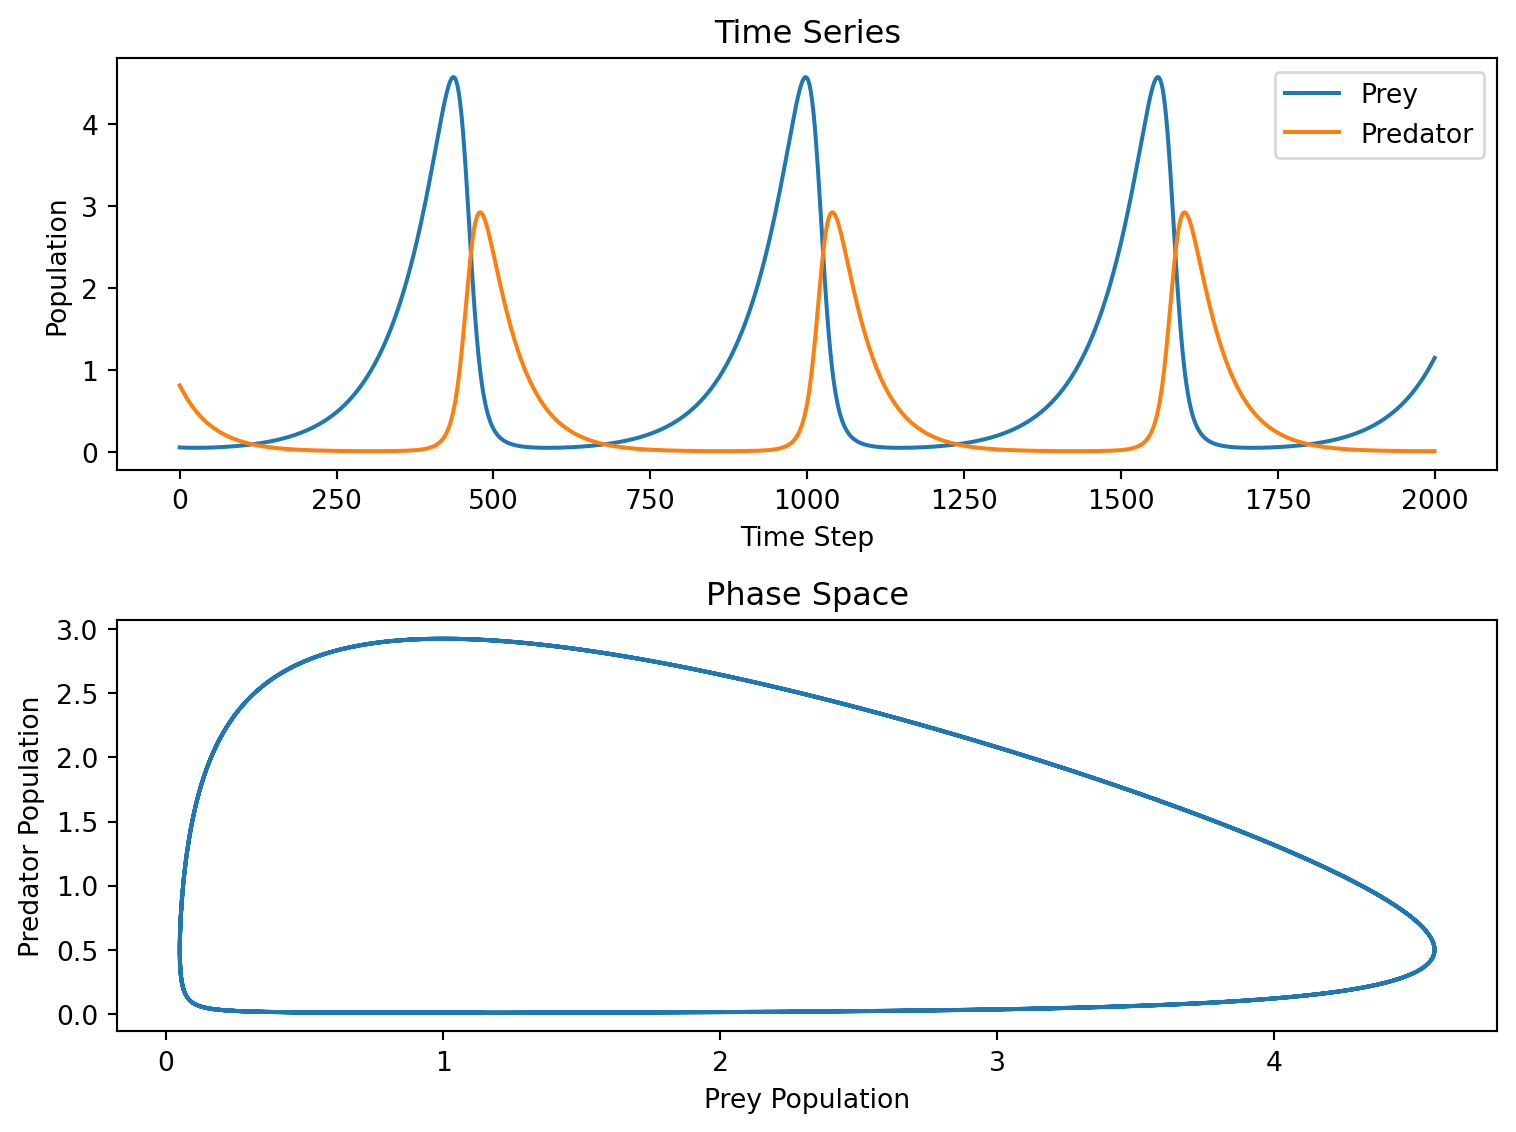

In [4]:
#| fig-cap: "Example of the Lotka-Volterra model integration."
#| code-fold: true

period = 40.0 
n_time_steps = 2000
model = LotkaVolterra(period=period, n_time_steps=n_time_steps)
initial_state = torch.rand(2)

# Note that calling the model will call its forward method for a nn.Module
solution = model(initial_state)

# Time series plot
plt.subplot(2, 1, 1)
plt.plot(solution[0, :].detach().numpy(), label='Prey')
plt.plot(solution[1, :].detach().numpy(), label='Predator')
plt.title('Time Series')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.legend()

# Phase space plot
plt.subplot(2, 1, 2)
plt.plot(solution[0, :].detach().numpy(), solution[1, :].detach().numpy())
plt.title('Phase Space')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')

plt.tight_layout()
plt.show()

Computing realization 1/1


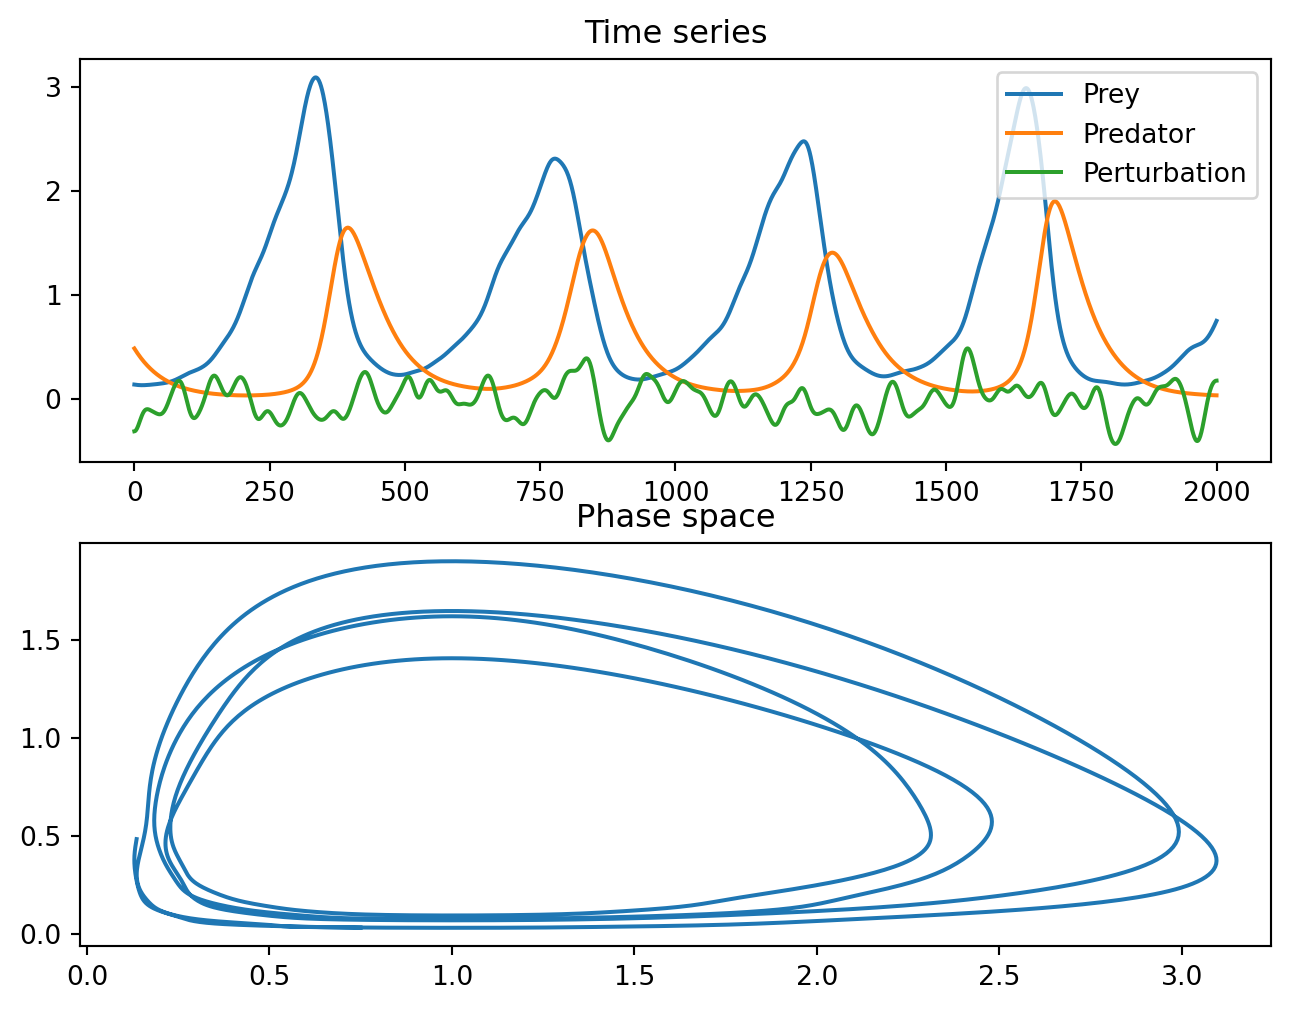

In [5]:
#| fig-cap: "Time variant Lotka-Volterra model with perturbations."
#| code-fold: true

from torch.nn.functional import pad

def generate_data_set(forward_model, period=40.0, n_time_steps=2000, n_realizations=10):
    """
    Generates a training dataset for the Lotka-Volterra model by simulating multiple realizations
    with perturbed parameters.

    Args:
        forward_model (callable): The Lotka-Volterra model to simulate.
        period (float, optional): Length of the time horizon. Defaults to 40.0.
        n_time_steps (int, optional): Number of time steps for integration. Defaults to 2000.
        n_realizations (int, optional): Number of realizations to simulate. Defaults to 10.
    
    Returns:
        tuple: A tuple containing two lists:
            - XX (list of torch.Tensor): Simulated population trajectories for each realization.
            - M (list of torch.Tensor): Perturbations for each realization.
    """
    
    pop_data_runs = []
    perturbations = []
    
    # Iterate over the number of desired realizations
    for run_idx in range(n_realizations):
        print(f'Computing realization {run_idx + 1}/{n_realizations}')
        
        # Noise pertubation to make more interesting dynamics
        noise = torch.randn(1, 1, n_time_steps + 1)        
        # Apply some smoothing to the pertubation using a low-pass filter to make natural variations
        for i in range(250):
            noise = pad(noise, pad=(1, 1), mode='reflect')
            noise = (noise[:, :, :-2] + 
                            2 * noise[:, :, 1:-1] + 
                            noise[:, :, 2:]) / 4
        noise = noise.squeeze()
        
        # Create a time variant model with the perturbation
        model = forward_model(period, n_time_steps, noise, time_variant=True)
        
        # Generate random initial conditions
        initial_pop = torch.rand(2)
        
        # Run the forward dynamics to generate the data
        pop_data = model(initial_pop)
        
        # Append the results to the respective lists
        pop_data_runs.append(pop_data)
        perturbations.append(noise)
    
    return pop_data_runs, perturbations

XX, M = generate_data_set(LotkaVolterra, period=40, n_time_steps=2000, n_realizations=1)

X = XX[0]
x = M[0]
plt.subplot(2,1,1)
plt.plot(X[0,:].detach())
plt.plot(X[1,:].detach())
plt.plot(x)
plt.legend(['Prey', 'Predator', 'Perturbation'])
plt.title('Time series')
plt.subplot(2,1,2)
plt.plot(X[0,:].detach(), X[1,:].detach())
plt.title('Phase space')

plt.show()